# In Vino Veritas

This project uses the wine quality dataset hosted on the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>. This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this project, we will only look at the data for *red* wine.

The problem which would be addressed is that whether a winemaker predict how a wine will be recieved based on the chemical properties of the wine? Are there any chemical indicators that correlate more strongly with the quality of wine?

<img src="http://www.winemaniacs.com/wp-content/uploads/2013/04/WineRotator-2000x925.jpg">

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn.model_selection

In [3]:
rawdata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep = ";")
rawdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

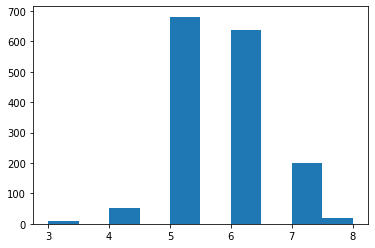

In [4]:
# Let's do some EDA.
print(rawdata.shape)
plt.hist(rawdata.quality)

The wines are rated out of 8 and significant number of wines have their qualities around 5-6. Only few of the wines are bad (having quality 1-4) and only few of them are very good (having quality 7-8).

In [5]:
rawdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
rawdata.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
rawdata.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# No cleaning required!

# Y would be the vector containing labels and that'd be what we would train our model to predict.However,
# we'd carry out binary classification and would divided the wines into 2 classes based on their quality. If 
# the quality is >= 7 then the wine would be labelled as 1 and instead it'd labeled as 0.

Y = np.array(rawdata['quality'])
Y = (Y >= 7) * 1
Y

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# The set of features which we would 

X = rawdata.drop("quality",axis = 1)
X = X.values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

For the classification purpose, we'd use **Random Forest**. **Random Forests** are *classifiers* which use multiple **Decision Trees**. All the trees are formed from bootstrap data, and during each split only a random subset of features are taken into consideration. In this manner more **randomness** is induced in the Random Forests as compared to *Bagging* and a *single Decision Tree*.

There are many ways of construction of random forests. These are the ways which include several different constraints such as number of trees, number of features which are used for determining the splits etc. These are known as hyperparameters. We need to try out our model on different hyperparameters so that we can find the best parameters that'd help generalizing our model. In the following code, we'd check the results on different number of trees and select the best value for that parameter by doing cross-validation.

In [10]:
# Some generic functions

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    print(confusion_matrix(ytest, clf.predict(Xtest)))
    print("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

numTrees = [i for i in range(1,41)]
results = []
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.33)

for j in numTrees:
    clf = RandomForestClassifier(j)
    results.append(cross_val_score(clf,Xtrain,ytrain,cv = 10))

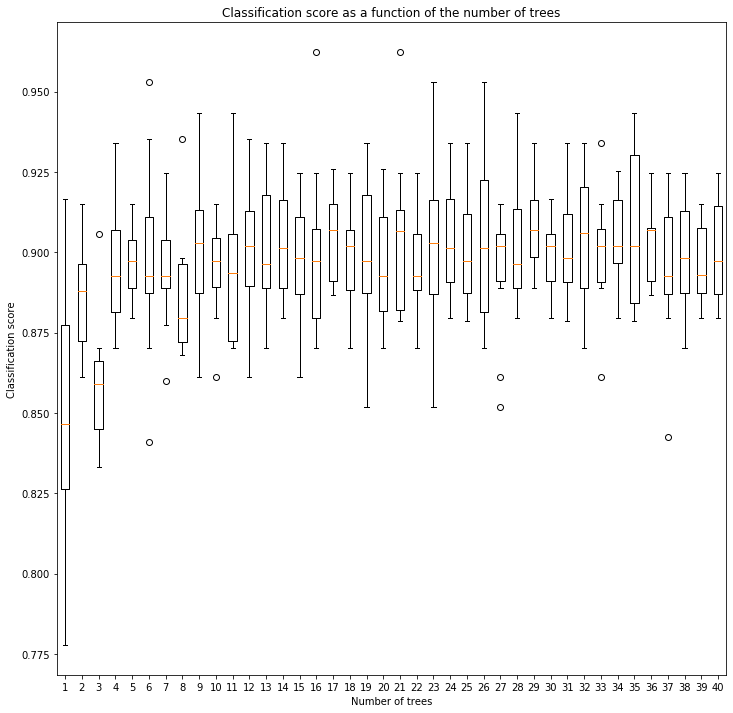

In [12]:
plt.figure(figsize=(12,12))
plt.boxplot(results)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

As we can see from the visualization, the cross_val_score seems to level off after initial gains after the number of trees go beyond 18-19. So we might reconsider using more trees in order to save the computational cost of fitting additional trees.

In [13]:
blind_guess_score = (1-Y.sum()/Y.shape[0])*100
print("BadWines:",blind_guess_score)

BadWines: 86.42901813633522


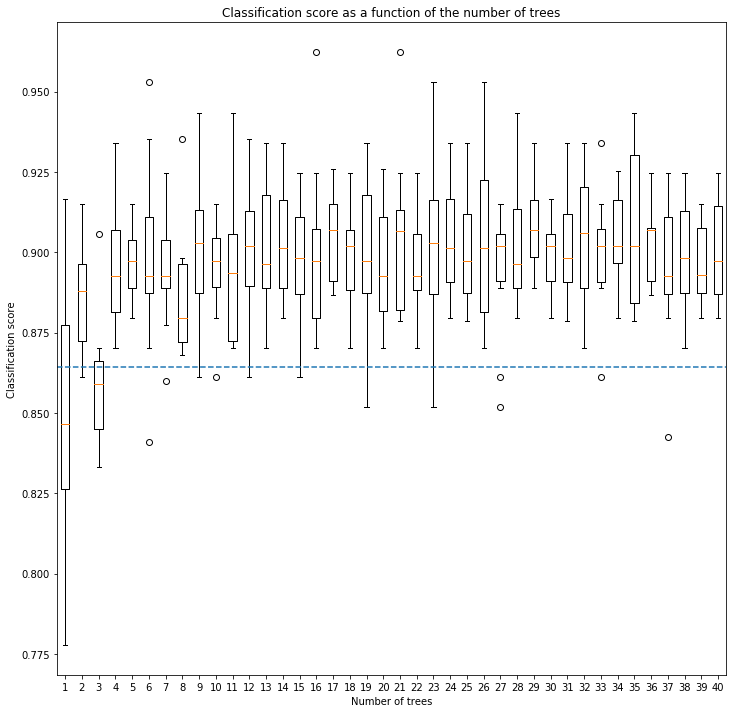

In [14]:
plt.figure(figsize=(12,12))
plt.boxplot(results)
plt.axhline(y=blind_guess_score/100,ls='--')
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

Earlier we had used accuracy as the score function. However, if the classes are unbalanced then then also blindly guessing the accuracy we'd also lead us to fairly good accuracy. Thus, we need to other metrics while doing classification in such scenarios.

F1 score is a metric which is generally used while doing classification for the skewed data. We'd repeat the cross_validation steps with the scoring func changed to F1 score.

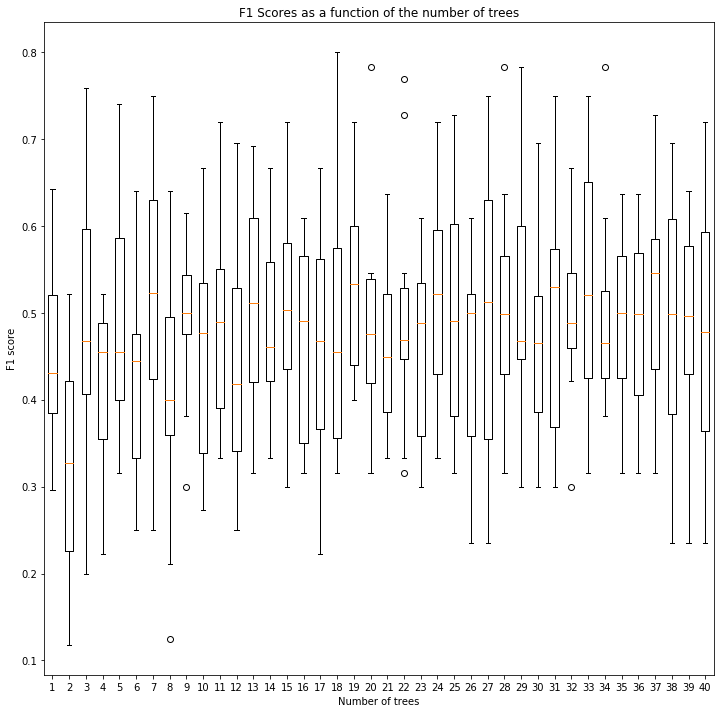

In [15]:
results2 = []
for j in numTrees:
    clf = RandomForestClassifier(j)
    results2.append(cross_val_score(clf,Xtrain,ytrain,scoring = 'f1',cv = 10))
    
plt.figure(figsize=(12,12))
plt.boxplot(results2)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.title('F1 Scores as a function of the number of trees')
plt.show()

The typical scores are around the 50% mark, and therefore the random forest fails to optimize the f1 score with larger number of trees.

Many classifiers, including random forest classifiers, can return **prediction probabilities**, which can be interpreted as the probability that a given prediction point falls into a given class (i.e., given the data $X$ and a candidate class $c$, the prediction probability states $P(Y = c | X)$). However, when the classes in the training data are **unbalanced**, as in this wine example, these prediction probabilities calculated by a classifier can be inaccurate. This is because many classifiers, again including random forests, do not have a way to internally adjust for this imbalance.

Despite the inaccuracy caused by imbalance, the prediction probabilities returned by a classifier can still be used to construct good predictions if we can choose the right way to turn a prediction probability into a prediction about the class that the datapoint belongs to. We call this task **calibration**.

If a classifier's prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5.

In [16]:
clf = RandomForestClassifier(n_estimators=19)
clf.fit(Xtrain,ytrain)
my_prediction = (clf.predict_proba(Xtrain)[:,1]>0.5).astype(int)
(my_prediction == clf.predict(Xtrain)).all()

True

In [17]:
def cutoff_predict(clf,X,cutoff):
    """
    cutoff_predict(clf, X, cutoff)

    Inputs:
    clf: a **trained** classifier object
    X: a 2D numpy array of features
    cutoff: a float giving the cutoff value used to convert
            predicted probabilities into a 0/1 prediction.

    Output:
    a numpy array of 0/1 predictions.
    """
    return (clf.predict_proba(X)[:,1]>cutoff).astype(int)

def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

Now we'd find a suitable cutoff in range(0.1,0.9,0.1) by running 10-fold cross validation. The n_estimators would be equal to 15

/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/parm_khakhar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


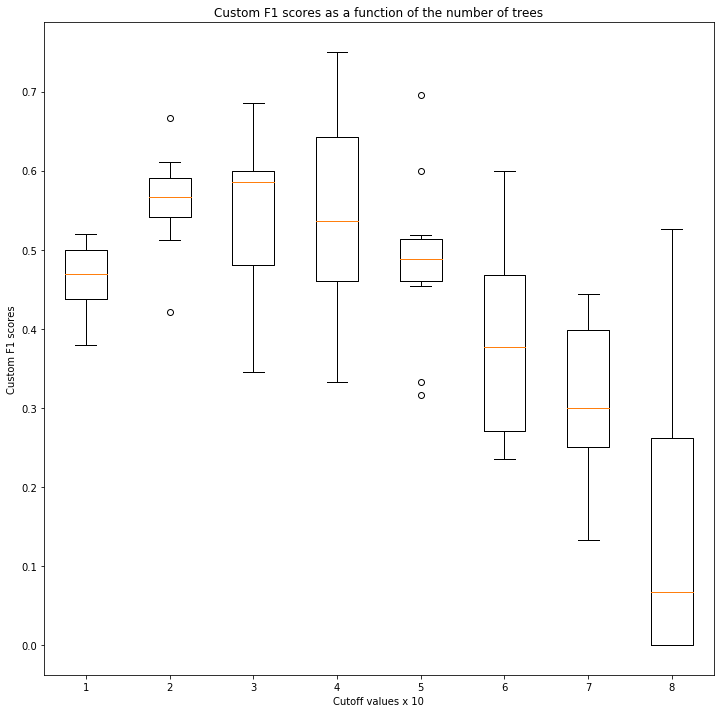

In [21]:
results3 = []
for i in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators=15)
    results3.append(cross_val_score(clf,Xtrain,ytrain,scoring = custom_f1(i),cv=10))

plt.figure(figsize=(12,12))
plt.boxplot(results3)
plt.xlabel('Cutoff values x 10')
plt.ylabel('Custom F1 scores')
plt.title('Custom F1 scores as a function of the number of trees')
plt.show()

A cutoff of about 0.2-0.3 appears to give the best predictive performance. It is intuitive that the cutoff is less than 0.5 because the training data contain many fewer examples of "good" wines, so we need to adjust the classifier's cutoff to reflect that fact that good wines are, in general, rarer. One could also describe this as incorporating prior information about how frequently each of the classes appears.

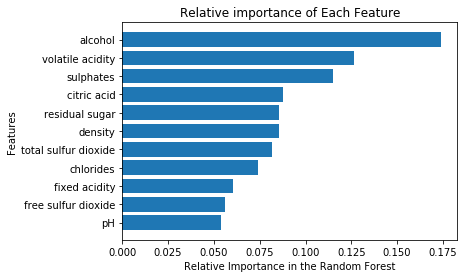

In [22]:
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = rawdata.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

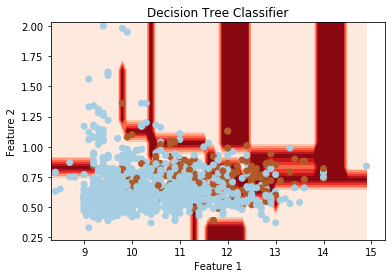

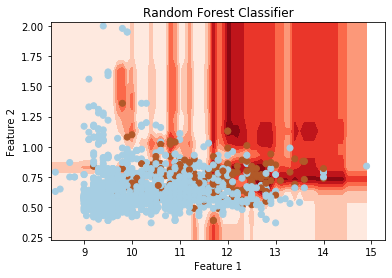

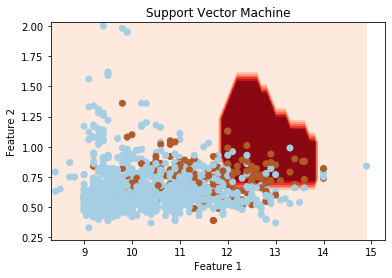

In [23]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")

    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
clfForest = RandomForestClassifier(n_estimators=15)
nXtrain = rawdata[['alcohol','sulphates']].values

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=15),
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'Support Vector Machine']
for c in range(3):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], nXtrain, Y)

The decision surfaces for the decision tree and random forest are very complex (wiggly contours with complex shapes). The decision tree is by far the most sensitive, showing only extreme classification probabilities that are heavily influenced by single points (see red stripes that seem to be drawn just to encapsulate observed "red" points). The random forest shows lower sensitivity, with isolated points having much less extreme classification probabilities.  The SVM is the least sensitive, since it has a very smooth decision boundary.

The complexity of the classifier corresponds to lower bias, since it can be more "true" to the training data, but this also makes the classifier more sensitive to random variations in the data, and thus increases variance.

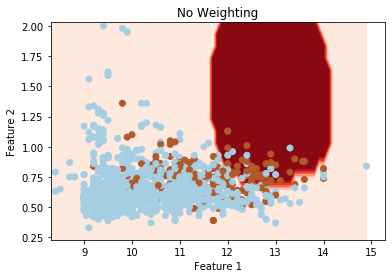

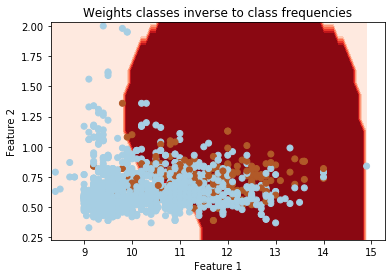

In [24]:
classifiers = [sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight=None),
               sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight='balanced')]

titleClassifer = ['No Weighting', 'Weights classes inverse to class frequencies']

for c in range(2):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], nXtrain, Y)

The first SVM with equal class weights only classifies a small subset of the positive training points correctly, but it only produces very few false positive predictions on the training set. Thus, it has higher precision, but lower recall than the second SVM with the **balanced** weighting option. The overall performance of the SVMs seems to be quite poor, with a lot of misclassified data points for both models. To improve the performance we would have to actually tune the parameters (`C`, `kernel`, `kernel parameter`, `class_weight`).